# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejemplo encajaria muy bien una regresión lineal.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [16]:
X = df[['YearsExperience']] # Extracts the 'YearsExperience' column from the dataframe df and assigns it to the variable X

y = df['Salary']# Assigns the 'Salary' column from the dataframe df to the variable y


In [17]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(X, y) 

"""Fits the linear regression model to the input data X and target values y.

Args:
    X (array-like): The input samples. 
    y (array-like): The target values.

Returns:
    self: The fitted Linear Regression model.
"""


LinearRegression()

In [19]:
lin_reg.score(X,y)

"""Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual 
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total 
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the 
model can be arbitrarily worse). A constant model that always 
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.
"""


0.9569566641435086

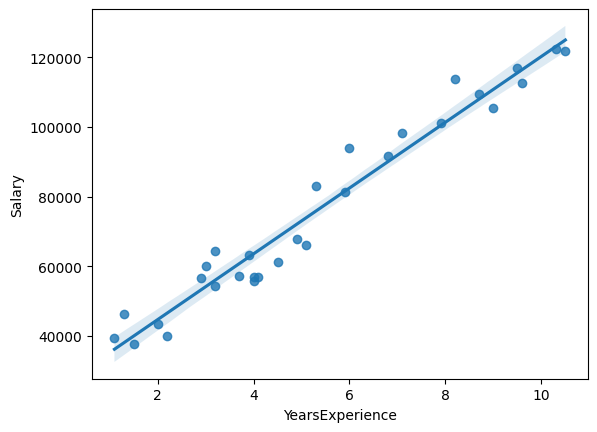

In [20]:
#  regplot plot the relationship between two variables.


sns.regplot(data = df,
           x = 'YearsExperience',
           y = 'Salary');  

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [21]:
df = pd.read_csv('position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [22]:

# Extracts the values from the second column of the dataframe df
X = df.iloc[:, 1:2].values

y = df.iloc[:, 2].values # Extracts the values from the third column of the dataframe df and assigns it to y


In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [24]:
lin_reg.score(X,y) 

"""Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual 
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the 
model can be arbitrarily worse). A constant model that always 
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.
"""


0.6690412331929895

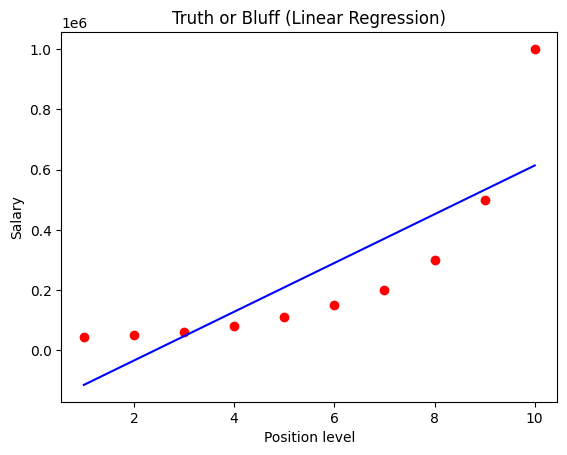

In [25]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

* It is plotting a scatter plot of the data points in X and y (in red). These are the actual data points.

* It is also plotting a linear regression prediction line (in blue). This shows the predictions from the lin_reg model.

* The x-axis is labeled 'Position level' and the y-axis is labeled 'Salary'. So this is plotting position level vs salary data.

* The title indicates this data is related to 'Truth or Bluff' and is using Linear Regression.

* The scatter plot compared to the linear regression line allows us to see how well the linear model fits the actual data.

* If the data closely aligns with the linear regression line, it suggests a strong linear relationship between position level and salary.

* Any deviations from the line indicate areas where the linear model does not fully capture the relationship in the data.

* So in summary, this is visualizing position level vs salary data, with a linear regression prediction line to assess the fit. The spread of the data compared to the line gives insights into the strength of the linear relationship.





Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

/var/folders/m8/hp9mxxbj6dv9x3px18fy22_r0000gn/T/ipykernel_29352/4008593066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y - lin_reg.predict(X));


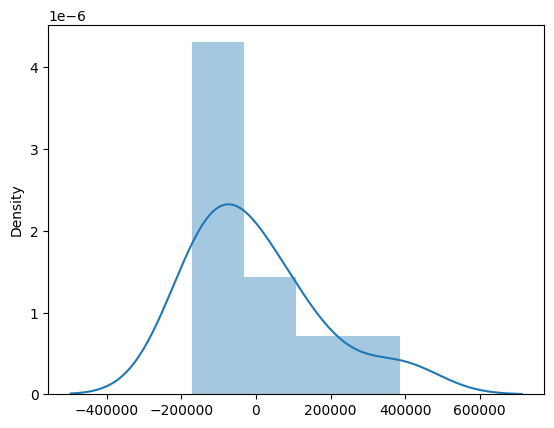

In [26]:
sns.distplot(y - lin_reg.predict(X));

# Plots the distribution of the residuals (y - y_predicted) from the linear regression model to assess the model fit and check assumptions.


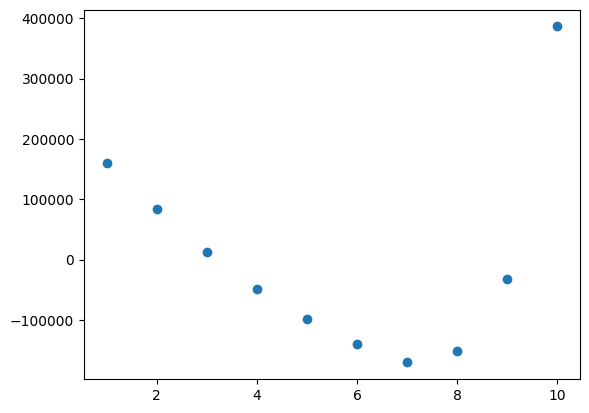

In [27]:
plt.scatter(X, y - lin_reg.predict(X))

# Scatter plot showing residuals (y - y_predicted) vs X to visualize model fit. 
# Useful for inspecting bias (systematic over/under-prediction), 
# heteroscedasticity (non-constant variance) and presence of outliers.


`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias.

Si degree = 2 y tenemos dos features, devolverá: a^0, a^1, b^1, a^2, a\*b, b^2

En nuestro caso tenemos una única variable con degree = 3: a^0, a^1, a^2, a^3

In [28]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [29]:
from sklearn.preprocessing import PolynomialFeatures

'''Fits the polynomial features to the data X 
and transforms X to a new feature space of the given degree.
This allows applying polynomial regression on the dataset.'''

poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [40]:
# Fits the polynomial regression model on the given input data X_poly and target values y

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [31]:
pol_reg.coef_ 

# The model coefficients learned by the polynomial regression model during fitting. 
# This contains the coefficient values for each polynomial term in the model.
# Can be used to understand the contribution of each term or make predictions on new data.


array([     0.        , 180664.33566432, -48548.95104895,   4120.04662005])

In [32]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

`x^0 + x^1 + x^2 + x^3 + x^4 `

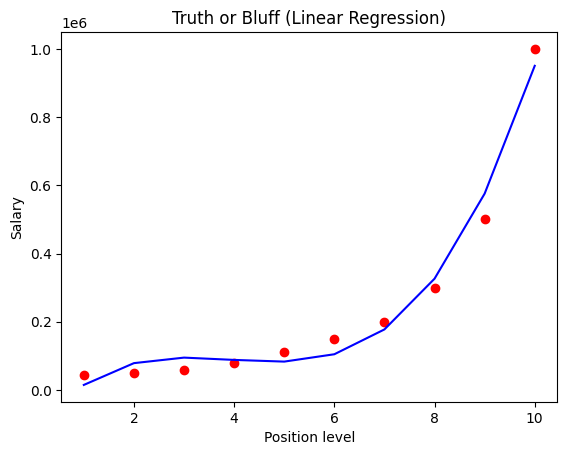

In [33]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [43]:
# Returns the coefficient of determination (R^2) score of the 
# polynomial regression model on the given test data X_poly and y
pol_reg.score(X_poly,y).round(2)

0.98

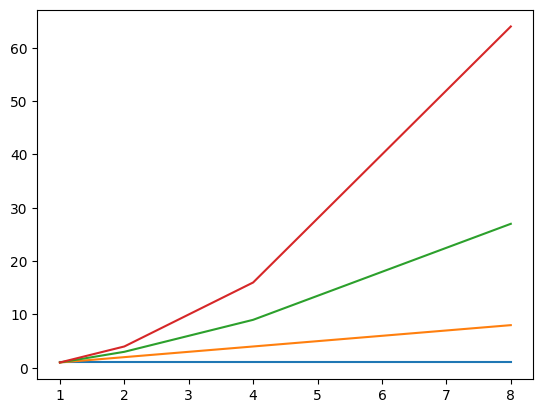

In [35]:
X_poly.T

plt.plot(X_poly[1],X_poly[0])
plt.plot(X_poly[1],X_poly[1])
plt.plot(X_poly[1],X_poly[2])
plt.plot(X_poly[1],X_poly[3])


Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

In [36]:
print(lin_reg.predict([[7.3]]))# Predicts housing price for given input features 


[395081.81818182]


In [37]:
print(pol_reg.predict(poly_feats.transform([[7.3]])))

# Predicts housing price for given input features 
# using the fitted polynomial regression model


[213110.8916084]


In [54]:
df = pd.read_csv('position_salaries.csv')

X = df.iloc[:, 1:2].values
# Extracts the second column from the DataFrame df into the variable X. 
# This selects a single feature from the data to use for model training.



y = df.iloc[:, 2].values

# Extracts the third column from the DataFrame df into the variable y.
# This selects the target feature from the data to use for model training.


In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2,random_state=2023)

In [48]:
X_test

array([[  1.,   9.,  81., 729.],
       [  1.,   3.,   9.,  27.]])

In [49]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

In [50]:
predictions = pol_reg.predict(X_test)

In [51]:
df_preds = pd.DataFrame(predictions, columns = ['predictions'])


df_preds['real_value'] = pd.Series(y_test)
df_preds

,predictions,real_value
0,603924.313392,500000
1,99799.872259,60000


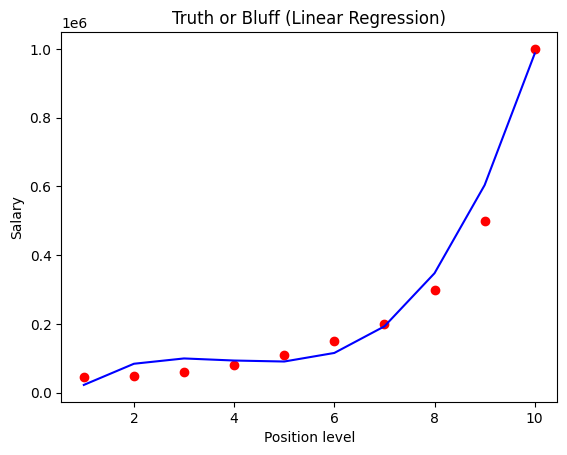

In [52]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [53]:
from sklearn.metrics import r2_score
r2_score(pol_reg.predict(X_test), y_test)

# Calculates the R^2 (coefficient of determination) regression score between the polynomial regression predictions on the test data (X_test) and the actual test labels (y_test). Useful for evaluating model performance.


0.9025401591036263

overfiting is when the model is too complex to fit the data. the target is to find the model that fits the data well.
with this line the target stays outside the model.

solution: Drops the 'target' column from the dataframe df
x=df.drop(['target'],axis=1)